
![datasciencelogo](images/logo.png)

![forestfires](images/Deerfire.jpg)

**Hallo**, reader. In this notebook, I want to share about the model building of Fire Forest Prediction, also Uni-variate analysis of the target variable. I already plotted some charts and graphs to describe how the target variable is changing and what are the properties for that.

<br>

#### Table of Content:
1. **Analysis on the data**
        * basic info about data
        * what are the Numerical features?
        * what are the Continous Numerical features?
        * what are the Discrate Numerical features?
        * what are the Categorical features? and
        * quantitative analysis on those features.
 <br>
2. **Statistical insights of all the features**
<br>
3. **Uni-variate analysis of Area/Target variabl**
        * Scatter Plot
        * Line Plot
        * PDF (probability density function) Plot
        * CDF (cumulative distribution function) Plot
        * Histogram Plot
        * Violin Plot
<br>
4. **Data Preprocessing**
        * Encoding of data
        * Feature selection
        * Train test split
<br>
5. **Model building**
        * Model Building using Selected features 
        * Cross Validation
        * Metric Reports
 

#### **Utils:**

In [1]:
# import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf

In [2]:
# changing the max columns value
pd.set_option('display.max_columns', None)
# changing the max rows value
pd.set_option('display.max_rows', None)

In [6]:
# make a sequential pallete
cm = sns.light_palette("green",as_cmap=True)

In [3]:
py.offline.init_notebook_mode(connected = True) # build offline plotly interactive plot
cf.go_offline() # go offline on demand by using
cf.set_config_file(theme='solar') # set the theme of the plotly permanently
plt.style.use('ggplot') # set matplotlib style

#### Analysis on the data

In [4]:
df = pd.read_csv('input/forestfires.csv') # read csv file
# df.head().style.set_properties(**{'background-color':'CornflowerBlue',
#     'color': 'Gainsboro',
#     'border-color': 'white'})
df.head().style.background_gradient(cmap='Oranges') # show few first rows

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.200000,26.200000,94.300000,5.100000,8.200000,51,6.700000,0.000000,0.000000
1,7,4,oct,tue,90.600000,35.400000,669.100000,6.700000,18.000000,33,0.900000,0.000000,0.000000
2,7,4,oct,sat,90.600000,43.700000,686.900000,6.700000,14.600000,33,1.300000,0.000000,0.000000
3,8,6,mar,fri,91.700000,33.300000,77.500000,9.000000,8.300000,97,4.000000,0.200000,0.000000
4,8,6,mar,sun,89.300000,51.300000,102.200000,9.600000,11.400000,99,1.800000,0.000000,0.000000


In [7]:
df.info() # show dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


#### **What are the numerical features?**

In [7]:
# filter non object datatype
numerical_features = [features for features in df.columns 
                                if df[features].dtypes != 'O']
print('Number of Numerical variables are: ', len(numerical_features))
print('Number features are: ', numerical_features)
df[numerical_features].head().style.background_gradient(cmap=cm)

Number of Numerical variables are:  11
Number features are:  ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.200000,26.200000,94.300000,5.100000,8.200000,51,6.700000,0.000000,0.000000
1,7,4,90.600000,35.400000,669.100000,6.700000,18.000000,33,0.900000,0.000000,0.000000
2,7,4,90.600000,43.700000,686.900000,6.700000,14.600000,33,1.300000,0.000000,0.000000
3,8,6,91.700000,33.300000,77.500000,9.000000,8.300000,97,4.000000,0.200000,0.000000
4,8,6,89.300000,51.300000,102.200000,9.600000,11.400000,99,1.800000,0.000000,0.000000


In [8]:
discreate_feature = [features for features in numerical_features 
                            if len(df[features].unique())<20]
print(f'length of discreate numerical variables are:{len(discreate_feature)}')
print(f'And the discreate features are: {discreate_feature}')
# lets see the head of the data frame consist of discreate numerical values
df[discreate_feature].head().style.background_gradient(cm).highlight_null('purple')

length of discreate numerical variables are:3
And the discreate features are: ['X', 'Y', 'rain']


,X,Y,rain
0,7,5,0.000000
1,7,4,0.000000
2,7,4,0.000000
3,8,6,0.200000
4,8,6,0.000000


In [8]:
df['X'].value_counts()

4    91
6    86
2    73
8    61
7    60
3    55
1    48
5    30
9    13
Name: X, dtype: int64

In [9]:
df['Y'].value_counts()

4    203
5    125
6     74
3     64
2     44
9      6
8      1
Name: Y, dtype: int64

In [10]:
df['rain'].value_counts()

0.0    509
0.8      2
0.2      2
0.4      1
6.4      1
1.4      1
1.0      1
Name: rain, dtype: int64

In [11]:
# lets see the difference values in each discreate variables
print(df['X'].value_counts())
print()
print(df['Y'].value_counts())
print()
print(df['rain'].value_counts())

4    91
6    86
2    73
8    61
7    60
3    55
1    48
5    30
9    13
Name: X, dtype: int64

4    203
5    125
6     74
3     64
2     44
9      6
8      1
Name: Y, dtype: int64

0.0    509
0.8      2
0.2      2
0.4      1
6.4      1
1.4      1
1.0      1
Name: rain, dtype: int64


In [9]:
# lets search for year feature
year_feature = [features for features in numerical_features
                    if 'Yr' in features or
                     'Year' in features or 'yr' in features 
                     or 'year' in features]
print(f'year features are : {year_feature}')

year features are : []


In [10]:
continuous_feature = [features for features in numerical_features 
                                if features not in discreate_feature]
print(f'Continuous feature Count {len(continuous_feature)}')
print(f'Continuous feature are: {continuous_feature}')

# lets see the head
df[continuous_feature].head().style.background_gradient(cmap=cm)

Continuous feature Count 8
Continuous feature are: ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area']


,FFMC,DMC,DC,ISI,temp,RH,wind,area
0,86.200000,26.200000,94.300000,5.100000,8.200000,51,6.700000,0.000000
1,90.600000,35.400000,669.100000,6.700000,18.000000,33,0.900000,0.000000
2,90.600000,43.700000,686.900000,6.700000,14.600000,33,1.300000,0.000000
3,91.700000,33.300000,77.500000,9.000000,8.300000,97,4.000000,0.000000
4,89.300000,51.300000,102.200000,9.600000,11.400000,99,1.800000,0.000000


In [11]:
categorical_features = [features for features in df.columns 
                                if df[features].dtypes == 'O']
print(f'Now categorical variables are: {categorical_features}')
print(f'number of categorical variables are: {len(categorical_features)}')

# see the head
# CAN'T COLOR A CATEGORICAL VARIABLE
df[categorical_features].head()

Now categorical variables are: ['month', 'day']
number of categorical variables are: 2


,month,day
0,mar,fri
1,oct,tue
2,oct,sat
3,mar,fri
4,mar,sun


In [11]:
df['month'].describe()

count     517
unique     12
top       aug
freq      184
Name: month, dtype: object

In [12]:
df['day'].describe()

count     517
unique      7
top       sun
freq       95
Name: day, dtype: object

In [13]:
# lets see the difference values in each categorical variables
print(df['month'].value_counts())
print()
print(df['day'].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


In [14]:
df.describe().style.background_gradient(cmap='Reds')

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#### Lets bring some color and draw some graphs

|Type of variable | Column name|
|--|--|
|Numerical Variables| 'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'|
|Year variables/features|No year variables|
|Discreate Variables|'X', 'Y', 'rain'|
|Continuous Variables|'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area'|
|Categorical Variables| 'month', 'day'|

#### **Uni-variate analysis of Area:**

#### **Scatter Plot of Area:**

In [15]:
df['area'].iplot(kind = 'scatter', # create the scatter plot
                    mode = 'markers', # set the markers type
                    title = 'Scatter plot of area', # set the scatter plot title
                     yTitle = 'area', xTitle = 'id') # set the title of y-axis and x-axis

#### **Few observations**

 - This shows the different values of the target variable in the form of dots/bubbles Hoover over and what are the values of each points.
- It shows that there are some extreme values in the area column and most of the values are near to zero.This makes sense because we can see forests getting burned out but in most cases, fire can't spread enough. And from the statistical table, we can also verify that the huge fire spread outs are few as the mean of the area column is 12.84
- And the interesting thing is the max (top 3) values of area don't really have any patern. Like we could say if FFDM is around this much then there is a high probability of having huge burn of area. But this kind of pattern makes no scene in this data for any value of an area.

#### **Line plot of Area**

In [16]:
df['area'].iplot(title='Line plot of area', # set the line plot title 
                    yTitle='area', xTitle='id') 

#### **Density (PDF) Plot of Area:**

#### **Few observations:**
- In this plot how the area is changing row-wise.
- It's a normal line plot to make you understand how the area is changing (a Scatter plot could be enough.  But sometimes, line plot make more sense to people and some times scatter plot, both shows kind of same things but different way).
- This plot also shows that the target is continuous.

In [11]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1) # for pseudo-random numbers

x = np.array(df['area']) # set the value of the x-axis
hist_data = [x]
group_labels = ['area'] # set the label of the y-axis

fig = ff.create_distplot(hist_data,group_labels )
fig.show() # showing the figure

#### **Few observations:**
- Now this is the denstity aka PDF plot for area you might need to zoom to see the details.
- This plot shows that the mean value for the area is near zero (but not zero) and there are fewer huge burned areas.

#### **Histogram of Area**

In [17]:
pd.DataFrame(df['area']).iplot(kind="histogram", bins = 40, 
                                            theme='solar', 
                                            title='Histogram of area',
                                            xTitle='area', yTitle='Count',
                                            asFigure=True)

#### **Few observations:**
- People often called Histograms as Distribution plot, as this show the distribution of a particular feature. Now by distribution, I mean how many points of a feature lies in a particular range.
- After observing the plot you will be noticed that 465 points which are having values from (-25) (actually 0, but mentioned in the plot ) to 24.9. Then there are 37 points which ranges from 25 to 74.9 and so on.
- Again, this showed us that there are few burn outs which covers less area. 
- Just think, the area is in hectar so can you imagine how huge 1090.84 hectar would be.

#### **Violin Plot of Area:**

In [12]:
import plotly.express as px

# df = px.data.tips()
fig = px.violin(df, y='area',box=True, # draw box plot inside the violin
                    points = 'all' # can be 'outliers', or False 
                    )
fig.show()

#### **Few observations:**
- I think this is an interesting plot, why? cause in this 1 plot you can see most of the commonly use statistical terms has been ploted
- You can get the value of quantiles,  max value, min value, median, kde everything. So Hoover over the plot and you will get to known what is the max value, the median and how the kde is changing.

#### **Label Encoding:**
Using label encoding to encode the categorical variables.

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in categorical_features:
    df[i] = label_encoder.fit_transform(df[i])

#### **Model using selected features:**

In [14]:
all_fe = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp',
            'RH', 'wind', 'rain', 'area']

#### **Lets check correlation of different  features with target:**

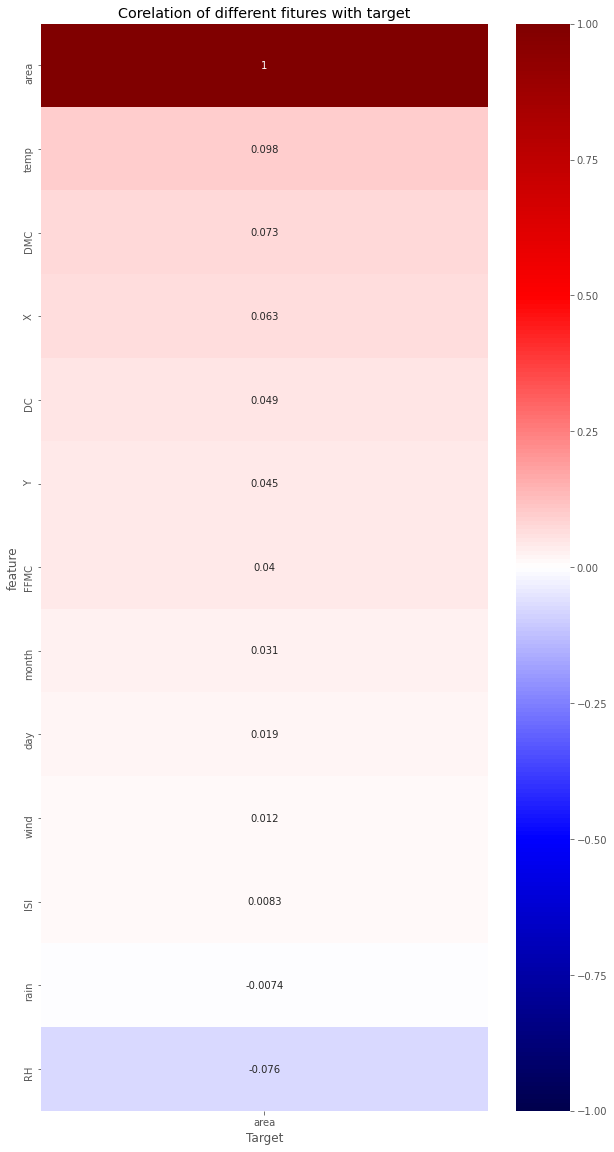

In [15]:
corr_new_train = df.corr()     # compute pairwise correlation of columns
plt.figure(figsize =  (10, 20)) # create a new figure

# draw a heatmap
sns.heatmap(corr_new_train[['area']].sort_values(by=['area'],
    ascending=False).head(60), vmin=-1,
    cmap='seismic', annot=True)

plt.ylabel('feature') # set the label for the y-axis
plt.xlabel('Target' ) # set the label for the x-axis
plt.title('Corelation of different fitures with target') # set the title for the figure
plt.show() # showing the figure

#### **Taking top 6 features for model building.**

In [16]:
fs1 =['X', 'Y', 'month', 'FFMC', 'DMC', 'DC', 'temp', 'area']

In [17]:
df_fs1 = df[fs1]
df_fs1.head()

,X,Y,month,FFMC,DMC,DC,temp,area
0,7,5,7,86.2,26.2,94.3,8.2,0.0
1,7,4,10,90.6,35.4,669.1,18.0,0.0
2,7,4,10,90.6,43.7,686.9,14.6,0.0
3,8,6,7,91.7,33.3,77.5,8.3,0.0
4,8,6,7,89.3,51.3,102.2,11.4,0.0


#### **Train Test (val) Split:**

In [18]:
SEED = 42

data = df_fs1.copy()    # create data
y = data['area']    # create y-parameter
x = data.drop(['area'], axis=1) # create x-parameter

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, 
                                                                    test_size=0.2,
                                                                    random_state = SEED)

I have tried normal Random forest, Random forest with no Randomized Search CV, xgboost and stacking of multiple ml models and results are something like this.

|reg      | rmse    |   mse | r2        |
| - | - | - | - |
|simple_rf = |109.5595|12003.2882|-0.0182|
|rscv_rf = |108.3183|11732.8603|0.00465|
|rscv_xgboost = |108.7711|11831.1615|-0.00368|
|stacking = |109.0897|11900.57185|-0.0095|
|rf with rscv and feature selection = |106.35|11311.77|0.04|

<br>

PS: rscv is Randomized Search CV and rf is random forest.

So, the improvements in **rf with rscv and feature selection** major thats why I am keeping it.

#### **Model Building using Selected features:**

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [20]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, # (optional) start of interval range
    stop = 2000, # end of interval range
    num = 10)] # 200., 400., 800,. ... 2000.(10 numbers)

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
    'max_depth': max_depth, 'min_samples_split':min_samples_split,
    'min_samples_leaf': min_samples_leaf, 'bootstrap':bootstrap}

In [21]:
reg_rf_rscv = RandomForestRegressor()

In [22]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search_rf = RandomizedSearchCV(reg_rf_rscv, random_grid,
    n_iter=5,
    n_jobs=1, # n_jobs tells the engine how many processors it is allowed to use.
    cv=5, verbose=2)

In [23]:
random_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True, total=  14.7s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.6s remaining:    0.0s


[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True, total=   8.6s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True, total=   9.3s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True, total=  14.3s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True, total=  16.0s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1600, mi

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [32]:
random_search_rf.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [33]:
base_model1 = RandomForestRegressor(n_estimators=1800, min_samples_split=2,
    min_samples_leaf=2, max_features='auto',
    max_depth=100, bootstrap=True, random_state=SEED )

base_model1.fit(x_train, y_train)

RandomForestRegressor(max_depth=100, min_samples_leaf=2, n_estimators=1800,
                      random_state=42)

In [34]:
y_pred_rf_rscv = base_model1.predict(x_val)

In [28]:
def MSE(model_preds, ground_truths):
    return mean_squared_error(model_preds, ground_truths)

def MAE(model_preds, ground_truths):
    return mean_absolute_error(model_preds, ground_truths)

def Other_Err(model_preds, ground_truths):
    return r2_score(ground_truths, model_preds)

def RMSE(model_preds, ground_truths):
    return np.sqrt(mean_squared_error(model_preds, ground_truths))

In [35]:
print(f'mean squared error: {MSE(y_pred_rf_rscv, y_val)}')
print(f'mean absolute error:{MAE(y_pred_rf_rscv, y_val)}')
print(f'r2 error: {Other_Err(y_pred_rf_rscv, y_val)}')
print(f'root mean squared error: {RMSE(y_pred_rf_rscv, y_val)}')

mean squared error: 11352.012654730215
mean absolute error:25.870628609532822
r2 error: 0.03696625886386584
root mean squared error: 106.54582420128071


#### **Cross Validation CV:**

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Generate cross validation folds for the forest fires dataset. It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [37]:
score = cross_val_score(reg_rf_rscv, x_train, y_train, 
    cv=k_fold, n_jobs=1, scoring='r2')
print(score)

[ -0.55584683  -0.91109006  -0.29457384  -0.06077607  -2.80107544
  -0.17546354  -0.02204976 -11.67737487  -6.38291885  -1.72365619]


In [38]:
print('train r2 %2f' % (1 *score.mean()))

train r2 -2.460483


In [39]:
score_val = cross_val_score(reg_rf_rscv, x_val, y_val, 
    cv=k_fold, n_jobs=1, scoring='r2')
print(score_val)

[-5.06479890e+02 -1.06393430e-01 -1.65580633e+01 -1.75145130e-01
 -4.25068206e+01 -9.36514214e+00 -1.23269673e+01 -1.10429574e+00
  5.60535660e-02 -2.53034086e-01]


In [40]:
print('evaluation r2 %2f' % (1 * score_val.mean()))

evaluation r2 -58.881970


In [41]:
# ploting R2 score for training data
pd.DataFrame(score).iplot(title='R2 score of different CV for training data',
    xTitle='count', yTitle='R2 Score')

In [42]:
# ploting R2 score for validation data
pd.DataFrame(score_val).iplot(title='R2 score of different CV for validation data', 
    xTitle='count', yTitle='R2 Score')

#### **Metric Reports**

| Metrics | Values |
| - | - |
| MSE | 11352.01 |
| RMSE | 106.54 |
| MAE | 25.87 |
| R2 Score | 0.03 |

In [43]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(reg_rf_rscv, open(filename, 'wb'))